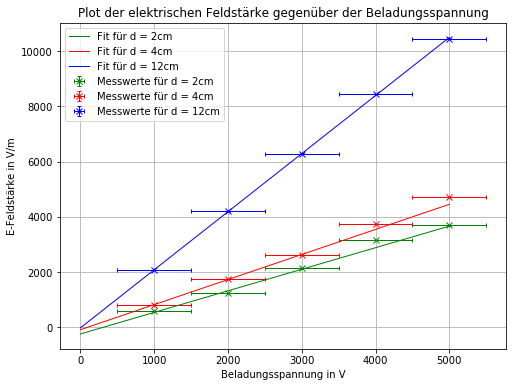

0.780288745176194 0.00047096505838464933
0.9071875801581495 0.00047096507694270134
2.1015276873289896 0.0009468359691683622


array([  2.10152769, -15.11074924])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import scipy.optimize 

##Messbereich in V/m
mb = np.loadtxt("messwerte.txt",usecols = 4)*1000

##Beladespannung in V
Ub_ = np.loadtxt("messwerte.txt",usecols = 0)*1000
sigUb_ = 500

##Kugeldurchmesser in m
dk = np.loadtxt("messwerte.txt",usecols = 1)/100
##Radius
rk = dk/2

##gemessene Spannung beladen in V
Ub = np.loadtxt("messwerte.txt",usecols = 2)
##systematischer Messfehler
sigUb = np.array([0.0005,0.0005,0.0005,0.005,0.005,0.0005,0.0005,0.0005,0.005,0.005,0.00005,0.0005,0.0005,0.0005,0.0005])
##gemessene Spannung entladen in V
Ue = np.loadtxt("messwerte.txt",usecols = 3)
##systematischer Messfehler
sigUe = np.array([0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.00005,0.00005,0.00005,0.00005,0.00005])

##Differenz vom be und entladen
U = Ub - Ue
sigU = np.sqrt(sigUb**2+sigUe**2)


##Elektrisches Feld beim beladen
E = mb/10 * U
sigE = sigU*mb/10

E = np.reshape(E,(3,5))
Ub_ = np.reshape(Ub_,(3,5))

sigE = np.reshape(sigE,(3,5))

##Plots der Feldstärken

def Efield(x,m,c):
    return m*x+c

x = np.arange(0,5000,0.1)

plt.figure(figsize=(8,6))

popt1, pcov1 = scipy.optimize.curve_fit(Efield,Ub_[0],E[0],sigma = sigE[0], p0=[0,0], absolute_sigma=True)
popt2, pcov2 = scipy.optimize.curve_fit(Efield,Ub_[1],E[1],sigma = sigE[1], p0=[0,0], absolute_sigma=True)
popt3, pcov3 = scipy.optimize.curve_fit(Efield,Ub_[2],E[2],sigma = sigE[2], p0=[0,0], absolute_sigma=True)

plt.errorbar(Ub_[0],E[0],xerr=sigUb_,yerr=sigE[0],fmt='x',color = 'g', ecolor = 'g',linewidth = 1,label="Messwerte für d = 2cm",capsize = 2)
plt.plot(x,Efield(x,popt1[0],popt1[1]),linewidth = 1,color = 'g',label="Fit für d = 2cm")  

plt.errorbar(Ub_[1],E[1],xerr=sigUb_,yerr=sigE[1],fmt='x',color = 'r', ecolor = 'r',linewidth = 1,label="Messwerte für d = 4cm",capsize = 2)
plt.plot(x,Efield(x,popt2[0],popt2[1]),linewidth = 1,color = 'r',label="Fit für d = 4cm")  

plt.errorbar(Ub_[2],E[2],xerr=sigUb_,yerr=sigE[2],fmt='x',color = 'b', ecolor = 'b',linewidth = 1,label="Messwerte für d = 12cm",capsize = 2)
plt.plot(x,Efield(x,popt3[0],popt3[1]),linewidth = 1,color = 'b',label="Fit für d = 12cm")  

plt.xlabel("Beladungsspannung in V")
plt.ylabel("E-Feldstärke in V/m")
plt.legend(loc = "upper left")
plt.grid()
plt.title("Plot der elektrischen Feldstärke gegenüber der Beladungsspannung")
plt.savefig("allekugeln.png")

plt.show()

##Fehler der Parameter
m1err = np.sqrt(np.diag(pcov1))[0]
m2err = np.sqrt(np.diag(pcov2))[0]
m3err = np.sqrt(np.diag(pcov3))[0]

##Steigungen mit Fehler
print(popt1[0],m1err)
print(popt2[0],m2err)
print(popt3[0],m3err)
popt3

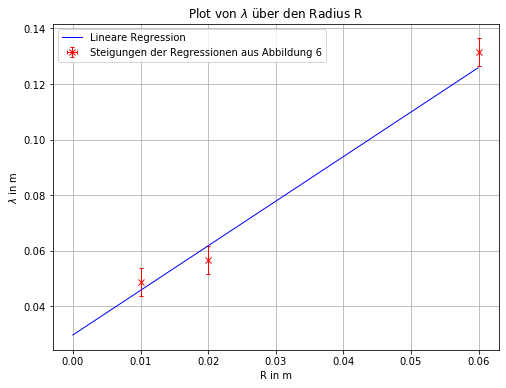

[1.60472726 0.02968016]
[[0.1111087         nan]
 [       nan 0.00242925]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt


In [2]:
##Berechnung des Proportionalitätsfaktors
##array der Steigungen
m = np.array([0.780,0.907,2.102])
sigm = 0.001

##Distanz zur Platte
r = 0.25
sigr = 0.005

##Kugelradien
R = np.array([0.01,0.02,0.06])
a = m*r**2
siga = np.sqrt(sigr**2*(2*m*r)**2+sigm**2*r**2)



##Regression
popt, pcov = scipy.optimize.curve_fit(Efield,R,a,sigma = siga, p0=[0,0], absolute_sigma=True)
x = np.arange(0,0.06,0.0001)

#plot
plt.figure(figsize=(8,6))
plt.errorbar(R,a,xerr = 0,yerr=sigr,fmt='x',color = 'r', ecolor = 'r',linewidth = 1,label = "Steigungen der Regressionen aus Abbildung 6",capsize = 2)
plt.plot(x,Efield(x,popt[0],popt[1]),color = 'b',linewidth = 1,label = "Lineare Regression")
plt.xlabel("R in m")
plt.ylabel("$\lambda$ in m")
plt.title("Plot von $\lambda$ über den Radius R")
plt.grid()
plt.legend(loc = "upper left")
plt.savefig("mr2.png")
plt.show()

print(popt)
print(np.sqrt(pcov))